# Convolutional Neural Networks

# Importar Librerías

Este código importa las bibliotecas necesarias para realizar operaciones de manipulación de datos, visualización y evaluación de modelos de aprendizaje automático

In [2]:
import numpy as np  # Importa la librería NumPy con el alias np
import os  # Importa el módulo os para interactuar con el sistema operativo
import re  # Importa el módulo re para trabajar con expresiones regulares
import matplotlib.pyplot as plt  
%matplotlib inline 
from sklearn.model_selection import train_test_split  # Importa train_test_split para dividir datos en conjuntos de entrenamiento y prueba
from sklearn.metrics import classification_report  # Importa classification_report para generar un informe de clasificación


Este fragmento de código importa varias capas y utilidades necesarias de Keras y TensorFlow para construir y compilar modelos de redes neuronales.

In [3]:
import keras  # Importa Keras
import tensorflow as tf  # Importa TensorFlow
from tensorflow.keras.utils import to_categorical  # Importa to_categorical para codificación one-hot
from keras.models import Sequential, Model  # Importa Sequential y Model para definir modelos
from tensorflow.keras.layers import Input  # Importa Input para definir capas de entrada
from keras.layers import Dense, Dropout, Flatten  # Importa capas comunes: Dense, Dropout, Flatten
from tensorflow.keras.layers import (  # Importa capas adicionales de TensorFlow
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU  # Importa LeakyReLU para activación de funciones de activación ReLU con fugas

# Cargar set de Imágenes

Este código recorre recursivamente el directorio especificado, contando las imágenes en cada subdirectorio y almacenándolas en una lista. Además, muestra información sobre el proceso de lectura de imágenes.

In [4]:
import os  # Importa el módulo os para interactuar con el sistema operativo
import re  # Importa el módulo re para trabajar con expresiones regulares
import matplotlib.pyplot as plt  # Importa la librería Matplotlib con el alias plt

# Directorio de las imágenes
dirname = os.path.join(os.getcwd(), r'E:/ITM_9_IA/Entrega/Practica_4/Imagenes')
imgpath = dirname + os.sep 

# Listas para almacenar las imágenes y los directorios
images = []
directories = []
dircount = []
prevRoot = ''
cant = 0

print("Leyendo imágenes de", imgpath)

# Recorre todos los archivos y directorios en el directorio imgpath
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        # Verifica si el archivo es una imagen
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            # Incrementa el contador de imágenes
            cant = cant + 1
            # Obtiene la ruta completa de la imagen
            filepath = os.path.join(root, filename)
            # Lee la imagen utilizando matplotlib
            image = plt.imread(filepath)
            # Verifica si la imagen tiene 3 dimensiones (es decir, es una imagen RGB)
            if len(image.shape) == 3:
                # Agrega la imagen a la lista de imágenes
                images.append(image)
            # Muestra un mensaje de progreso
            b = "Leyendo..." + str(cant)
            print(b, end="\r")
            # Verifica si se cambió de directorio
            if prevRoot != root:
                # Muestra el directorio y la cantidad de imágenes en él
                print(root, cant)
                prevRoot = root
                directories.append(root)
                dircount.append(cant)
                cant = 0

# Agrega el contador de imágenes del último directorio
dircount.append(cant)
# Ajusta el primer elemento de dircount
dircount = dircount[1:]
dircount[0] = dircount[0] + 1
# Imprime la cantidad de directorios leídos y la cantidad de imágenes en cada directorio
print('Directorios leídos:', len(directories))
print("Imágenes en cada directorio:", dircount)
# Imprime la suma total de imágenes en subdirectorios
print('Suma total de imágenes en subdirectorios:', sum(dircount))


Leyendo imágenes de E:/ITM_9_IA/Entrega/Practica_4/Imagenes3\
E:/ITM_9_IA/Entrega/Practica_4/Imagenes3\asalto 1
E:/ITM_9_IA/Entrega/Practica_4/Imagenes3\incendio 6709
E:/ITM_9_IA/Entrega/Practica_4/Imagenes3\inundacion 9389
E:/ITM_9_IA/Entrega/Practica_4/Imagenes3\robo 5529
E:/ITM_9_IA/Entrega/Practica_4/Imagenes3\tornado 8765
Directorios leídos: 5
Imágenes en cada directorio: [6710, 9389, 5529, 8765, 8435]
Suma total de imágenes en subdirectorios: 38828


# Creamos las etiquetas

Este código crea etiquetas para las imágenes basadas en el número de imágenes en cada directorio. Cada etiqueta corresponde al índice del directorio en la lista dircount. La cantidad total de etiquetas creadas se imprime al final.

In [5]:
labels = []  # Lista para almacenar las etiquetas de las imágenes
indice = 0  # Inicializa el índice de la etiqueta

# Itera sobre la cantidad de imágenes en cada directorio
for cantidad in dircount:
    # Itera sobre el rango de la cantidad de imágenes en el directorio actual
    for i in range(cantidad):
        # Agrega la etiqueta correspondiente a la lista de etiquetas
        labels.append(indice)
    # Incrementa el índice de la etiqueta para el siguiente directorio
    indice = indice + 1

# Imprime la cantidad de etiquetas creadas
print("Cantidad de etiquetas creadas:", len(labels))


Cantidad de etiquetas creadas: 38828


Este código imprime el índice y el nombre de cada directorio en la lista directories, y luego almacena los nombres de los directorios en la lista risk.

In [6]:
risk = []  # Lista para almacenar los nombres de los directorios (etiquetas)
indice = 0  # Inicializa el índice de los directorios

# Itera sobre cada directorio en la lista directories
for directorio in directories:
    # Divide la ruta del directorio en partes utilizando el separador del sistema operativo
    name = directorio.split(os.sep)
    # Imprime el índice y el nombre del directorio actual
    print(indice, name[len(name)-1])
    # Añade el nombre del directorio a la lista risk
    risk.append(name[len(name)-1])
    # Incrementa el índice de los directorios
    indice = indice + 1


0 asalto
1 incendio
2 inundacion
3 robo
4 tornado


Este fragmento de código convierte las listas de etiquetas e imágenes en matrices NumPy. Luego, encuentra las clases únicas en las etiquetas y calcula la cantidad total de clases únicas.

In [7]:
y = np.array(labels)  # Convierte la lista de etiquetas a un array de NumPy
X = np.array(images, dtype=np.uint8)  # Convierte la lista de imágenes a un array de NumPy con tipo de datos uint8

# Encuentra los números únicos de las etiquetas
classes = np.unique(y)  # Encuentra los valores únicos en el array de etiquetas
nClasses = len(classes)  # Calcula la cantidad de clases únicas
print('Número total de salidas:', nClasses)
print('Clases de salida:', classes)


Número total de salidas: 5
Clases de salida: [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

Este código utiliza la función train_test_split para dividir los datos en conjuntos de entrenamiento y prueba. Luego, imprime las formas (dimensiones) de los conjuntos de datos resultantes.

In [8]:
# Divide los datos en conjuntos de entrenamiento y prueba utilizando train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2)

# Imprime las formas (dimensiones) de los conjuntos de entrenamiento y prueba
print('Forma de los datos de entrenamiento:', train_X.shape, train_Y.shape)
print('Forma de los datos de prueba:', test_X.shape, test_Y.shape)


Forma de los datos de entrenamiento: (31062, 28, 28, 3) (31062,)
Forma de los datos de prueba: (7766, 28, 28, 3) (7766,)


Esto mostrará dos imágenes una al lado de la otra: la primera imagen será de los datos de entrenamiento y la segunda de los datos de prueba. Cada imagen tendrá un título que mostrará la etiqueta correspondiente.

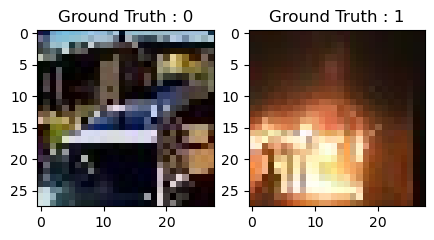

In [9]:
# Configura el tamaño de la figura
plt.figure(figsize=[5,5])

# Muestra la primera imagen en los datos de entrenamiento
plt.subplot(121)  # Configura el primer subplot en una fila y dos columnas
plt.imshow(train_X[0,:,:], cmap='gray')  # Muestra la imagen en escala de grises
plt.title("Ground Truth : {}".format(train_Y[0]))  # Establece el título con la etiqueta correspondiente

# Muestra la primera imagen en los datos de prueba
plt.subplot(122)  # Configura el segundo subplot en una fila y dos columnas
plt.imshow(test_X[0,:,:], cmap='gray')  # Muestra la imagen en escala de grises
plt.title("Ground Truth : {}".format(test_Y[0]))  # Establece el título con la etiqueta correspondiente

# Muestra la figura
plt.show()

# Preprocesamos las imagenes

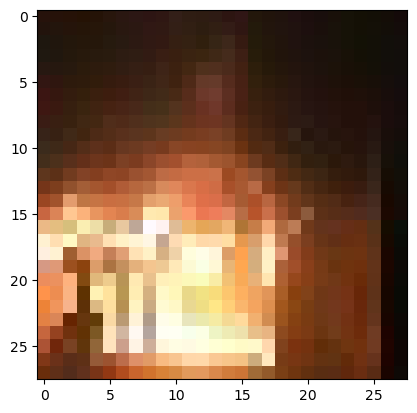

In [10]:
train_X = train_X.astype('float32')  # Convierte los datos de entrenamiento a tipo float32
test_X = test_X.astype('float32')  # Convierte los datos de prueba a tipo float32
train_X = train_X / 255.  # Normaliza los datos de entrenamiento dividiéndolos por 255
test_X = test_X / 255.  # Normaliza los datos de prueba dividiéndolos por 255
plt.imshow(test_X[0,:,:])  # Muestra una imagen de los datos de prueba después de la normalización


## Hacemos el One-hot Encoding para la red

In [11]:
# Cambia las etiquetas de categóricas a codificación one-hot
train_Y_one_hot = to_categorical(train_Y)  # Etiquetas de entrenamiento
test_Y_one_hot = to_categorical(test_Y)  # Etiquetas de prueba

# Muestra el cambio de etiqueta de categoría usando codificación one-hot
print('Etiqueta original:', train_Y[0])
print('Después de la conversión a one-hot:', train_Y_one_hot[0])


Etiqueta original: 0
Después de la conversión a one-hot: [1. 0. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [12]:
# Mezcla todo y crea los conjuntos de entrenamiento y validación
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [13]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(24849, 28, 28, 3) (6213, 28, 28, 3) (24849, 5) (6213, 5)


# Creamos el modelo de CNN

In [14]:
INIT_LR = 0.001  # Valor inicial de la tasa de aprendizaje (learning rate)
epochs = 60  # Cantidad de iteraciones completas al conjunto de imágenes de entrenamiento
batch_size = 40  # Cantidad de imágenes que se toman a la vez en memoria

In [15]:
risk_model = Sequential()  # Crea un modelo secuencial

# Capa de entrada con forma (28, 28, 3)
risk_model.add(Input(shape=(28, 28, 3)))

# Capa convolucional con 32 filtros y tamaño de kernel (3, 3)
risk_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same'))

# Función de activación LeakyReLU con alpha=0.1
risk_model.add(LeakyReLU(alpha=0.1))

# Capa de pooling para reducir la dimensionalidad
risk_model.add(MaxPooling2D((2, 2), padding='same'))

# Capa de dropout para regularización
risk_model.add(Dropout(0.5))

# Aplanar los datos para la capa densa
risk_model.add(Flatten())

# Capa densa con 32 unidades y función de activación lineal
risk_model.add(Dense(32, activation='linear'))

# Función de activación LeakyReLU con alpha=0.1
risk_model.add(LeakyReLU(alpha=0.1))

# Capa de dropout para regularización
risk_model.add(Dropout(0.5))

# Capa de salida con activación softmax para la clasificación de las clases
risk_model.add(Dense(nClasses, activation='softmax'))


risk_model.summary() es un método que muestra un resumen detallado de la arquitectura de la red neuronal definida en el modelo risk_model. Proporciona información sobre las capas de la red, incluyendo el tipo de capa, la forma de salida de cada capa, el número de parámetros entrenables y el número total de parámetros en la red. Este resumen es útil para comprender la estructura de la red, así como para verificar que la configuración de la red sea la deseada antes de entrenarla.

In [16]:
risk_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                200736    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32)                0

Estas líneas de código definen un programador de tasa de aprendizaje exponencial utilizando la clase ExponentialDecay de TensorFlow. Luego, compilan el modelo utilizando el optimizador SGD con la tasa de aprendizaje actualizada según el programador definido.

In [17]:
INIT_LR = 0.01  # Tasa de aprendizaje inicial
decay_steps = 100  # Número de pasos de decaimiento
decay_rate = 0.96  # Factor de decaimiento

# Define el programador de tasa de aprendizaje exponencial
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=INIT_LR,  # Tasa de aprendizaje inicial
    decay_steps=decay_steps,  # Número de pasos de decaimiento
    decay_rate=decay_rate,  # Factor de decaimiento
    staircase=True  # True para ajuste de la tasa de aprendizaje por escalones
)

# Compila el modelo con el optimizador SGD y la tasa de aprendizaje actualizada
risk_model.compile(
    loss=keras.losses.categorical_crossentropy,  # Función de pérdida
    optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),  # Optimizador con tasa de aprendizaje programada
    metrics=['accuracy']  # Métrica para evaluar el rendimiento del modelo
)


# Entrenamos el modelo: Aprende a clasificar imágenes

Esto entrena el modelo y guarda el historial del entrenamiento en la variable risk_train. Durante el entrenamiento, se mostrará información sobre la progresión del proceso, como la pérdida y la precisión en cada época.

In [18]:
risk_train = risk_model.fit(
    train_X,  # Datos de entrada de entrenamiento
    train_label,  # Etiquetas de entrenamiento
    batch_size=batch_size,  # Tamaño del lote
    epochs=epochs,  # Número de épocas
    verbose=1,  # Nivel de verbosidad (muestra información durante el entrenamiento)
    validation_data=(valid_X, valid_label)  # Datos de validación
)


Epoch 1/60
622/622 [==============================] - 8s 13ms/step - loss: 0.8423 - accuracy: 0.6971 - val_loss: 0.4030 - val_accuracy: 0.8753
Epoch 2/60
622/622 [==============================] - 8s 13ms/step - loss: 0.4538 - accuracy: 0.8571 - val_loss: 0.2692 - val_accuracy: 0.9313
Epoch 3/60
622/622 [==============================] - 8s 12ms/step - loss: 0.3628 - accuracy: 0.8906 - val_loss: 0.2223 - val_accuracy: 0.9413
Epoch 4/60
622/622 [==============================] - 8s 12ms/step - loss: 0.3185 - accuracy: 0.9079 - val_loss: 0.1986 - val_accuracy: 0.9488
Epoch 5/60
622/622 [==============================] - 8s 12ms/step - loss: 0.2942 - accuracy: 0.9128 - val_loss: 0.1788 - val_accuracy: 0.9528
Epoch 6/60
622/622 [==============================] - 7s 12ms/step - loss: 0.2734 - accuracy: 0.9206 - val_loss: 0.1702 - val_accuracy: 0.9533
Epoch 7/60
622/622 [==============================] - 7s 12ms/step - loss: 0.2613 - accuracy: 0.9241 - val_loss: 0.1628 - val_accuracy: 0.9559

El modelo se guarda en el archivo risk_model.keras. Este archivo contendrá la arquitectura del modelo, los pesos entrenados y cualquier configuración adicional que se haya especificado durante la compilación del modelo.

In [19]:
# guardar el modelo en el nuevo formato
risk_model.save("E://ITM_9_IA//Entrega//Practica_4//modelo//risk_model_h5.h5")

# Evaluamos la red

Este código evalúa el modelo risk_model utilizando los datos de prueba test_X y las etiquetas de prueba codificadas en one-hot test_Y_one_hot. El parámetro verbose=1 indica que se mostrará información durante la evaluación.

In [20]:
test_eval = risk_model.evaluate(test_X, test_Y_one_hot, verbose=1)

243/243 [==============================] - 1s 4ms/step - loss: 0.1247 - accuracy: 0.9636


Este código imprime la pérdida y la precisión del modelo evaluado en los datos de prueba.



In [21]:
print('Pérdida en prueba:', test_eval[0])  # Imprime la pérdida en los datos de prueba
print('Precisión en prueba:', test_eval[1])  # Imprime la precisión en los datos de prueba

Pérdida en prueba: 0.12466642260551453
Precisión en prueba: 0.963559091091156


El atributo history de risk_train contiene un diccionario con las métricas de entrenamiento y validación durante el entrenamiento del modelo risk_model. Puedes acceder a diferentes métricas, como la pérdida y la precisión, para el conjunto de entrenamiento y validación.

In [22]:
risk_train.history

{'loss': [0.8422564268112183,
  0.45377933979034424,
  0.36284351348876953,
  0.3184826672077179,
  0.2941696345806122,
  0.27344197034835815,
  0.2612619400024414,
  0.2550628185272217,
  0.24766068160533905,
  0.24256888031959534,
  0.23917481303215027,
  0.24143071472644806,
  0.2303946316242218,
  0.2307424396276474,
  0.2314922958612442,
  0.23187439143657684,
  0.23062445223331451,
  0.23090305924415588,
  0.2314780354499817,
  0.22894491255283356,
  0.2265499383211136,
  0.22468848526477814,
  0.23193643987178802,
  0.22646908462047577,
  0.2278527319431305,
  0.2288704663515091,
  0.23152917623519897,
  0.22777287662029266,
  0.2255571484565735,
  0.22900265455245972,
  0.2272004932165146,
  0.22828643023967743,
  0.23031114041805267,
  0.22688983380794525,
  0.2257101684808731,
  0.23158292472362518,
  0.22882086038589478,
  0.232853963971138,
  0.22912591695785522,
  0.22793912887573242,
  0.22600941359996796,
  0.23121310770511627,
  0.22633914649486542,
  0.2263775616884231

Este código traza las curvas de precisión y pérdida tanto para el conjunto de entrenamiento como para el conjunto de validación a lo largo de las épocas durante el entrenamiento del modelo.

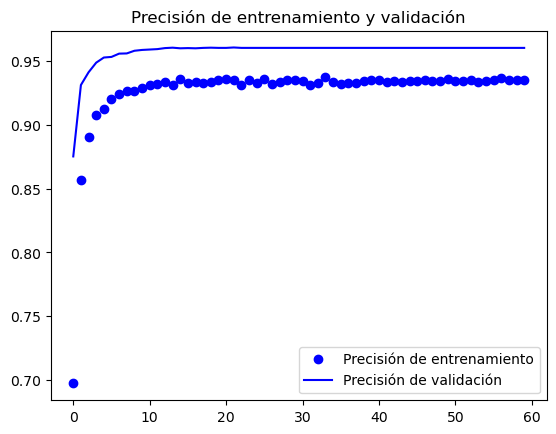

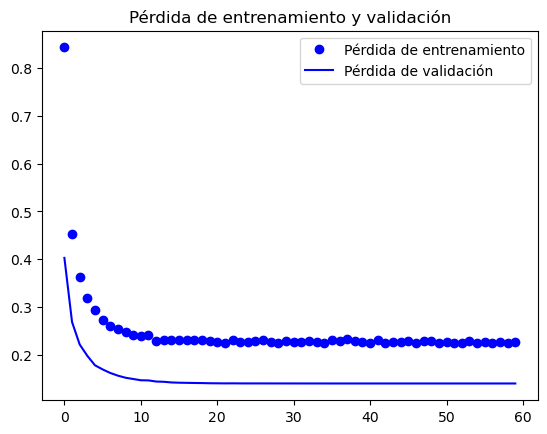

In [23]:
# Precisión y pérdida en el conjunto de entrenamiento
precisión_entrenamiento = risk_train.history['accuracy']
precisión_validación = risk_train.history['val_accuracy']
pérdida_entrenamiento = risk_train.history['loss']
pérdida_validación = risk_train.history['val_loss']

épocas = range(len(precisión_entrenamiento))  # Número de épocas

# Gráfico de la precisión durante el entrenamiento y la validación
plt.plot(épocas, precisión_entrenamiento, 'bo', label='Precisión de entrenamiento')  # Precisión en el conjunto de entrenamiento
plt.plot(épocas, precisión_validación, 'b', label='Precisión de validación')  # Precisión en el conjunto de validación
plt.title('Precisión de entrenamiento y validación')  # Título del gráfico
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar gráfico

# Gráfico de la pérdida durante el entrenamiento y la validación
plt.plot(épocas, pérdida_entrenamiento, 'bo', label='Pérdida de entrenamiento')  # Pérdida en el conjunto de entrenamiento
plt.plot(épocas, pérdida_validación, 'b', label='Pérdida de validación')  # Pérdida en el conjunto de validación
plt.title('Pérdida de entrenamiento y validación')  # Título del gráfico
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar gráfico


Este código utiliza el modelo risk_model para realizar predicciones sobre los datos de prueba test_X.
El resultado de esta operación será un conjunto de predicciones para los datos de prueba, almacenadas en la variable predicted_classes2. Cada predicción representa la probabilidad de pertenencia a cada clase para cada ejemplo en los datos de prueba.

In [24]:
predicted_classes2 = risk_model.predict(test_X)

Este bloque de código recorre las predicciones realizadas por el modelo, que están almacenadas en predicted_classes2. Luego, para cada predicción, encuentra la clase con la probabilidad más alta y la añade a la lista predicted_classes. Finalmente, convierte esta lista en un array NumPy. 

In [25]:
predicted_classes = []  # Lista para almacenar las clases predichas

# Itera sobre cada predicción realizada por el modelo
for predicted_risk in predicted_classes2:
    # Encuentra la clase con la probabilidad más alta y la añade a la lista
    predicted_classes.append(predicted_risk.tolist().index(max(predicted_risk)))

# Convierte la lista de clases predichas en un array NumPy
predicted_classes = np.array(predicted_classes)


El código predicted_classes.shape devuelve la forma (shape) del array predicted_classes, mientras que test_Y.shape devuelve la forma del array test_Y. Esto es útil para verificar si las dimensiones de las predicciones coinciden con las dimensiones de las etiquetas reales en los datos de prueba.
El resultado serán dos tuplas, donde el primer elemento de cada tupla representa el número de muestras y el segundo elemento representa el número de clases (si es un array de etiquetas). Esto permite verificar si las dimensiones coinciden entre las predicciones y las etiquetas reales.

In [26]:
predicted_classes.shape, test_Y.shape

((7766,), (7766,))

# Aprendamos de los errores: Qué mejorar

Este bloque de código identifica las predicciones correctas realizadas por el modelo y muestra nueve ejemplos de imágenes junto con las etiquetas predichas y reales. 

Se encontraron 7483 etiquetas correctas


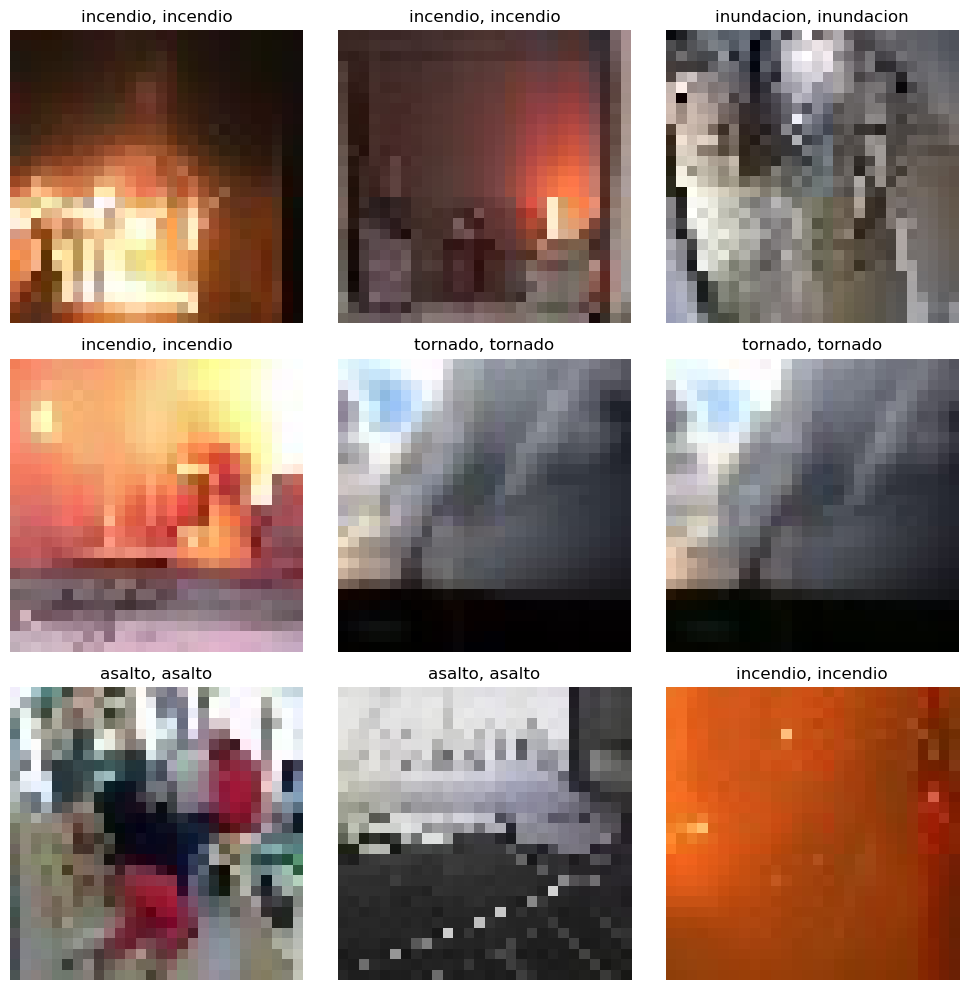

In [27]:
# Encontrar las predicciones correctas
correct = np.where(predicted_classes == test_Y)[0]
print("Se encontraron %d etiquetas correctas" % len(correct))

# Crear una figura con subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Iterar sobre las predicciones correctas y mostrar nueve ejemplos
for i, correct in enumerate(correct[0:9]):
    ax = axes[i // 3, i % 3]  # Seleccionar el eje correspondiente
    ax.imshow(test_X[correct].reshape(28, 28, 3), cmap='gray', interpolation='none')  # Mostrar la imagen
    # Establecer el título con la etiqueta predicha y la etiqueta real
    ax.set_title("{}, {}".format(risk[predicted_classes[correct]], risk[test_Y[correct]]))
    ax.axis('off')  # Opcional: ocultar los ejes

plt.tight_layout()  # Ajustar el diseño de la figura
plt.show()  # Mostrar la figura


Este bloque de código identifica las predicciones incorrectas realizadas por el modelo y muestra nueve ejemplos de imágenes junto con las etiquetas predichas y reales.

Se encontraron 283 etiquetas incorrectas


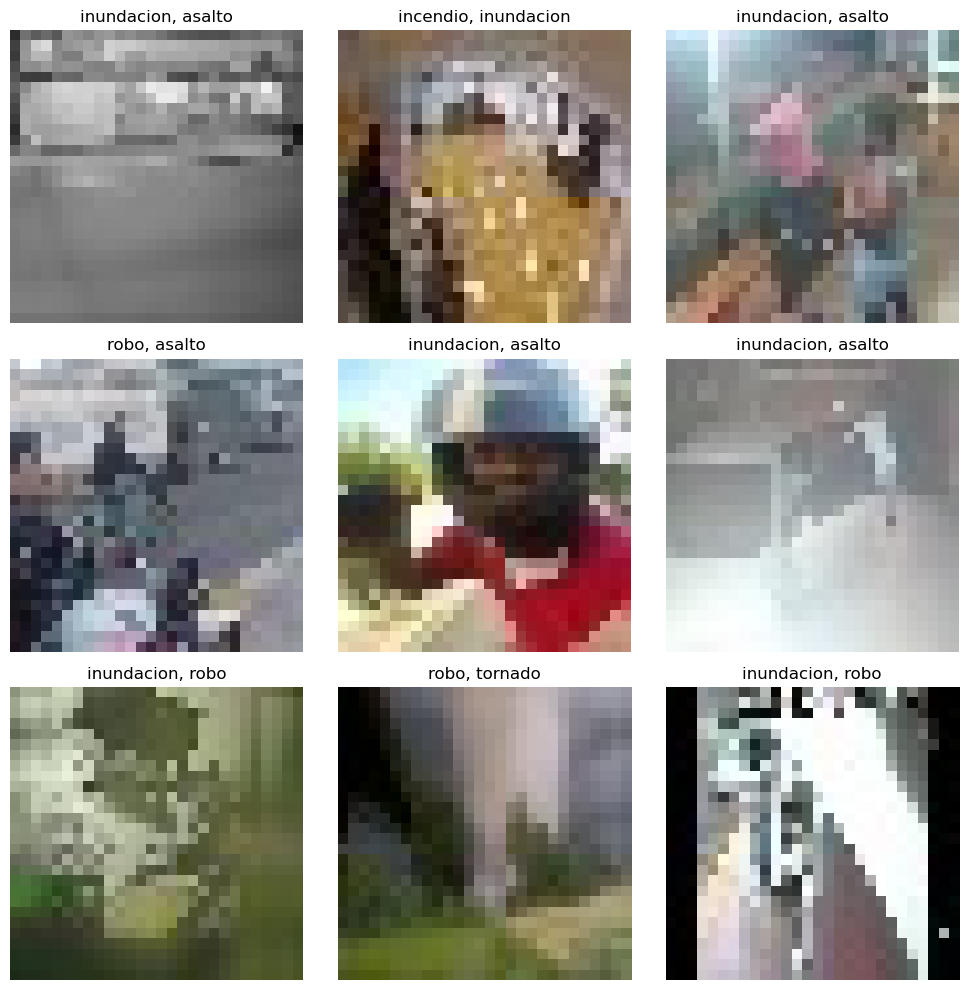

In [28]:
# Encontrar las predicciones incorrectas
incorrect = np.where(predicted_classes != test_Y)[0]
print("Se encontraron %d etiquetas incorrectas" % len(incorrect))

# Crear una figura con subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Iterar sobre las predicciones incorrectas y mostrar nueve ejemplos
for i, incorrect in enumerate(incorrect[0:9]):
    ax = axes[i // 3, i % 3]  # Seleccionar el eje correspondiente
    ax.imshow(test_X[incorrect].reshape(28, 28, 3), cmap='gray', interpolation='none')  # Mostrar la imagen
    # Establecer el título con la etiqueta predicha y la etiqueta real
    ax.set_title("{}, {}".format(risk[predicted_classes[incorrect]], risk[test_Y[incorrect]]))
    ax.axis('off')  # Opcional: ocultar los ejes

plt.tight_layout()  # Ajustar el diseño de la figura
plt.show()  # Mostrar la figura


Este informe proporciona una evaluación detallada del rendimiento del modelo en la clasificación de cada clase. Cada clase se identifica por su nombre y se muestran métricas de rendimiento como precisión, recall, F1-score y soporte. Esto ayuda a comprender cómo el modelo se desempeña en la clasificación de diferentes clases.

In [29]:
# Definir los nombres de destino para cada clase
target_names = ["Clase {}".format(i) for i in range(nClasses)]

# Imprimir el informe de clasificación
print(classification_report(test_Y, predicted_classes, target_names=target_names))


              precision    recall  f1-score   support

     Clase 0       0.98      0.93      0.95      1300
     Clase 1       1.00      0.99      0.99      1895
     Clase 2       0.86      0.94      0.90      1082
     Clase 3       0.97      0.98      0.98      1755
     Clase 4       0.98      0.96      0.97      1734

    accuracy                           0.96      7766
   macro avg       0.96      0.96      0.96      7766
weighted avg       0.97      0.96      0.96      7766



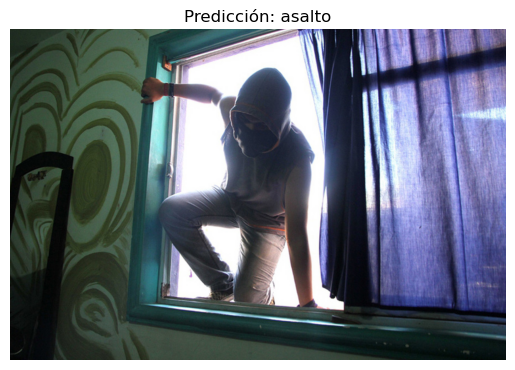

C:/Users/dante/Downloads/prueba_alcaraz/robocasa2.jpg asalto


In [30]:
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np

# Definimos una lista para las imágenes y los nombres de archivo
images = []
filenames = ['C:/Users/dante/Downloads/prueba_alcaraz/robocasa2.jpg',
             #'C:/Users/dante/Downloads/prueba_alcaraz/in2.jpg'
             ]

# Iteramos sobre los nombres de archivo para cargar y redimensionar las imágenes
for filepath in filenames:
    image = plt.imread(filepath)  # No especificar 0 para leer en color
    image_resized = resize(image, (28, 28), anti_aliasing=True, clip=False, preserve_range=True)
    images.append(image_resized)

# Convertimos la lista de imágenes a un array numpy
X = np.array(images, dtype=np.uint8)
test_X = X.astype('float32')
test_X = test_X / 255.0

# Realizamos la predicción usando el modelo
predicted_classes = risk_model.predict(test_X)

# Definimos una lista con las posibles clases (esto depende de tu modelo)
risk = ['asalto', 'incendio', 'inundacion', 'robo', 'tornado']  # Ejemplo de clases

# Iteramos sobre las predicciones y mostramos la imagen con la predicción correspondiente
for i, img_tagged in enumerate(predicted_classes):
    # Mostramos la imagen original
    original_image = plt.imread(filenames[i])  # Cargamos la imagen original para mostrarla
    plt.imshow(original_image)
    plt.title(f"Predicción: {risk[img_tagged.tolist().index(max(img_tagged))]}")
    plt.axis('off')  # Opcional: para ocultar los ejes
    plt.show()
    
    # Imprimimos el nombre del archivo y la predicción
    print(filenames[i], risk[img_tagged.tolist().index(max(img_tagged))])